In [2]:
import matplotlib.pyplot as plt
import numpy as np

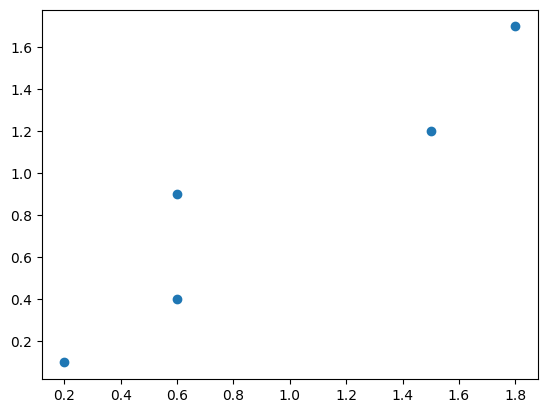

In [3]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x,y)

In [4]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.6)
X_train,y_train = np.array([0.6,1.8]), np.array([0.4,1.7])
X_test,y_test = np.array([0.2,0.6,1.5]), np.array([0.1,0.9,1.2])
X_train.shape # estos son 2 maneras de hacer lo mismo pero el segundo es a mano

(2,)

In [5]:
from sklearn.linear_model import LinearRegression
X_train.resize(len(X_train),1)
y_train.resize(len(y_train),1)
lr = LinearRegression()
lr.fit(X_train,y_train)
coefs = lr.coef_[0]
intercept = lr.intercept_[0]
print("y = {:.4f} + {:.4f}x".format(intercept,coefs[0]))
print(2,1)

y = -0.2500 + 1.0833x
2 1


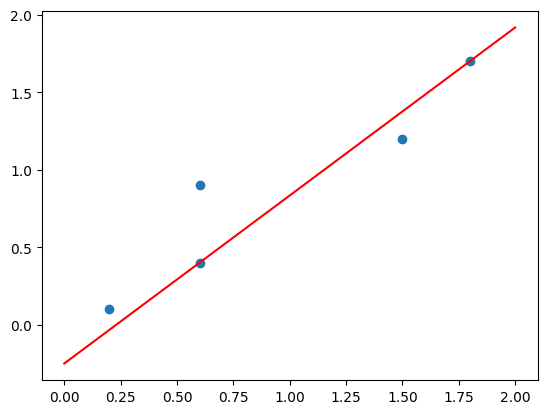

In [6]:
xx = np.linspace(0,2,2)
yy = lr.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx,yy,c='r')

In [7]:
from sklearn.metrics import mean_squared_error as mse
mse1 = mse(y_test, lr.predict(X_test.reshape(len(X_test),1)))
print('Error : {}'.format(mse1))

Error : 0.09946759259259248


In [8]:
# regularización ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
coefs = ridge.coef_[0]
intercept = ridge.intercept_[0] 
print(f"y = {coefs:.4f}x + {intercept:.4f}")

y = 0.7647x + 0.1324


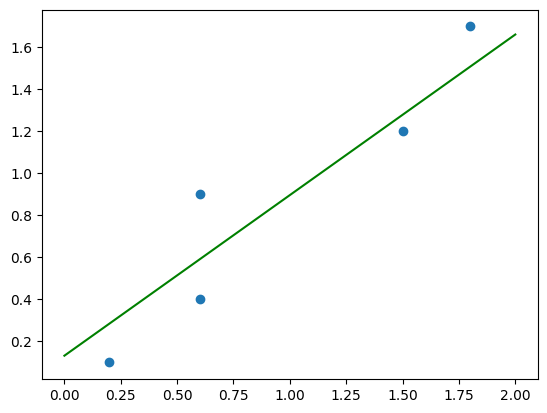

In [9]:
# Esta parte es para graficar nuestra linea anterior, teniendo 2 puntos entre el 0 y el 2, podemos predecir sus valores usando la funcion anterior y graficarlo
xx = np.linspace(0,2,2) 
yy2 = ridge.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx,yy2,c='g')

In [10]:
from sklearn.metrics import mean_squared_error as mse
mse2 = mse(y_test, ridge.predict(X_test.reshape(len(X_test), 1)))
print('Error : {}'.format(mse2))

Error : 0.04533737024221454


In [11]:
# Regularización Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(X_train,y_train)
coefs = lasso.coef_[0]
intercept = lasso.intercept_[0]
print("y = {:.4f} + {:.4f}x".format(intercept,coefs))

y = 0.7500 + 0.2500x


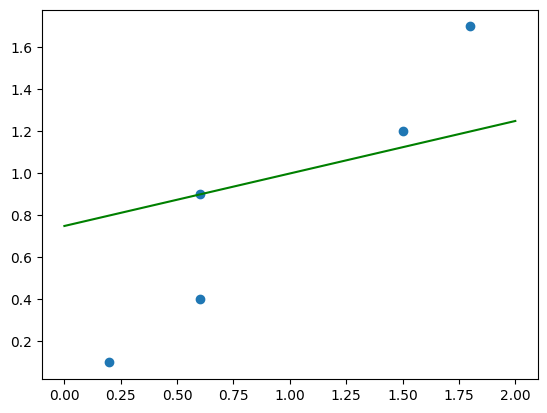

In [12]:
xx = np.linspace(0.0,2,2)
yy3 = lasso.predict(xx.reshape(len(xx),1))
plt.scatter(x,y)
plt.plot(xx,yy3,c='g')

In [13]:
from sklearn.metrics import mean_squared_error as mse
mse2 = mse(y_test, lasso.predict(X_test.reshape(len(X_test), 1)))
print('Error : {}'.format(mse2))

Error : 0.16520833333333337


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [15]:
df = pd.read_csv('../dataSets/families.csv')
df.tail()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5
933,204,62.5,63.0,65.27,2,2,female,57.0


In [16]:
import plotly.express as px
fig = px.scatter_3d(df, x='father', y='mother', z='childHeight')
fig.show()

In [17]:
X = df.iloc[:, [1,3]].values # estaturas de los 2 papas
y = df.iloc[:, 7].values # estatura a predecir, la de los hijos

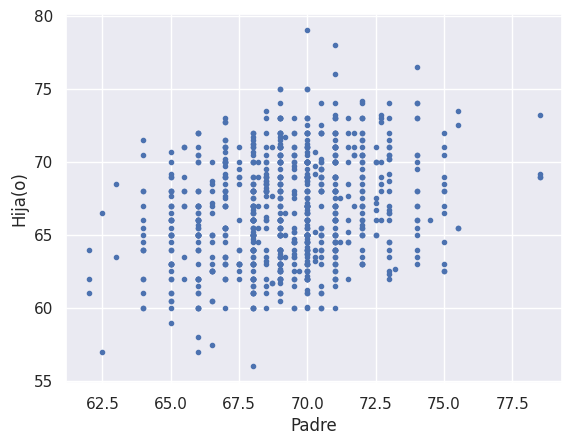

In [ ]:
plt.plot(X[:,0], y, 'b.')
plt.xlabel('Padre')
plt.ylabel('Hija(o)')
plt.show()      # Grafica relacion padre hij@

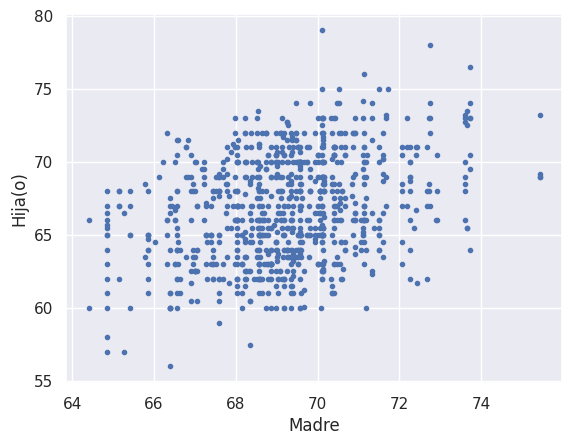

In [24]:
plt.plot(X[:,1], y, 'b.')
plt.xlabel('Madre')
plt.ylabel('Hija(o)')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# conjunto de entrenamiento y pruebas
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,
                                               random_state=2)

In [27]:
# modelo lineaal y su rendimiento
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('  R2 : ',r2_score(y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_pred)))

  R2 :  0.05375000577834266
RMSE :  3.360550318836952


In [28]:
print(lr.coef_)
print(lr.intercept_)

[0.07286771 0.55935083]
23.14535713417918
